In [382]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings


Javascript to avoid output in scrollable frames

In [383]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [384]:
#Reading the CSV Files
df = pd.read_csv('NYC_Loans.csv')

In [385]:
df.head()

Authority Name Fiscal Year End Date  \
0       Columbia County Capital Resource Corporation           12/31/2011   
1       Monroe County Sports Development Corporation           12/31/2011   
2  Riverhead IDA Economic Job Development Corpora...           12/31/2011   
3    Greene Tobacco Asset Securitization Corporation           12/31/2011   
4               Hudson Yards Development Corporation           06/30/2014   

  Loans Loan Fund Sources Recipient Name Recipient City Recipient State  \
0    No               NaN            NaN            NaN             NaN   
1    No               NaN            NaN            NaN             NaN   
2    No               NaN            NaN            NaN             NaN   
3    No               NaN            NaN            NaN             NaN   
4    No               NaN            NaN            NaN             NaN   

  Recipient Postal Code Date Loan Awarded  Original Loan Amount  \
0                   NaN               NaN                   NaN   
1                   NaN               NaN                   NaN   
2                   NaN               NaN                   NaN   
3                   NaN               NaN                   NaN   
4                   NaN               NaN                   NaN   

   Interest Rate  Loan Length  Amount Repaid Loan Purpose New Jobs  \
0            NaN          NaN            NaN          NaN      NaN   
1            NaN          NaN            NaN          NaN      NaN   
2            NaN          NaN            NaN          NaN      NaN   
3            NaN          NaN            NaN          NaN      NaN   
4            NaN          NaN            NaN          NaN      NaN   

   Jobs Planned  Jobs Created Loan Terms Completed  
0           NaN           NaN                  NaN  
1           NaN           NaN                  NaN  
2           NaN           NaN                  NaN  
3           NaN           NaN                  NaN  
4           NaN           NaN                  NaN

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13513 entries, 0 to 13512
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Authority Name         13513 non-null  object 
 1   Fiscal Year End Date   13513 non-null  object 
 2   Loans                  1540 non-null   object 
 3   Loan Fund Sources      11973 non-null  object 
 4   Recipient Name         11973 non-null  object 
 5   Recipient City         11973 non-null  object 
 6   Recipient State        11972 non-null  object 
 7   Recipient Postal Code  11973 non-null  object 
 8   Date Loan Awarded      11973 non-null  object 
 9   Original Loan Amount   11973 non-null  float64
 10  Interest Rate          11973 non-null  float64
 11  Loan Length            11973 non-null  float64
 12  Amount Repaid          11973 non-null  float64
 13  Loan Purpose           11973 non-null  object 
 14  New Jobs               11973 non-null  object 
 15  Jo

In [387]:
df.isnull().sum()

Authority Name               0
Fiscal Year End Date         0
Loans                    11973
Loan Fund Sources         1540
Recipient Name            1540
Recipient City            1540
Recipient State           1541
Recipient Postal Code     1540
Date Loan Awarded         1540
Original Loan Amount      1540
Interest Rate             1540
Loan Length               1540
Amount Repaid             1540
Loan Purpose              1540
New Jobs                  1540
Jobs Planned              7802
Jobs Created              7828
Loan Terms Completed      1540
dtype: int64

There are a lot of null values in the dataset

In [388]:
df.nunique()

Authority Name            311
Fiscal Year End Date       66
Loans                       1
Loan Fund Sources           6
Recipient Name           2764
Recipient City            424
Recipient State            11
Recipient Postal Code     546
Date Loan Awarded        2030
Original Loan Amount      847
Interest Rate             137
Loan Length                40
Amount Repaid            8869
Loan Purpose                8
New Jobs                    2
Jobs Planned               72
Jobs Created              137
Loan Terms Completed        2
dtype: int64

#### Are all the 1540 null values from the same row?


There is a peculiar feature of this data - 12 features have same number of NaN values, and there is a chance that these values might be in the same rows i.e. All 1540 of NaN values in each feature belongs to the same rows. Hence, we check for that possibility.

In [389]:
def checkNullIndex():
    cnt=0
    inx = df[df['Loan Terms Completed'].isnull()]
    #Converting the indices of null values 
    inx.index.tolist()
    for item in df:
        if df[item].isnull().sum() ==df['Loan Terms Completed'].isnull().sum():
            p = df[df[item].isnull()]
            p.index.tolist
            if set(p)==set(inx):
                print("True")
                cnt+=1
            else:
                print("False")
    print(cnt)


In [390]:
checkNullIndex()

True
True
True
True
True
True
True
True
True
True
True
True
12


Our hypothesis was correct. Hence we remove these rows

In [391]:
t = df[df['Loan Terms Completed'].isnull()]
t=t.index.tolist()

In [392]:
nulls=[]

for item in df:
    if df[item].isnull().sum()==1540:
        df = df.drop(t,axis=0)

In [393]:
df

Authority Name Fiscal Year End Date  \
11     Watertown Industrial Center Local Development ...           06/30/2011   
12     Watertown Industrial Center Local Development ...           06/30/2011   
13     Watertown Industrial Center Local Development ...           06/30/2011   
14     Watertown Industrial Center Local Development ...           06/30/2011   
21             Potsdam Community Development Corporation           05/31/2011   
...                                                  ...                  ...   
13508           Binghamton Local Development Corporation           08/31/2019   
13509           Binghamton Local Development Corporation           08/31/2019   
13510           Binghamton Local Development Corporation           08/31/2019   
13511           Binghamton Local Development Corporation           08/31/2019   
13512           Binghamton Local Development Corporation           08/31/2019   

      Loans Loan Fund Sources                                Recipient Name  \
11      NaN           Federal                           Ferguson Waterworks   
12      NaN           Federal                           Ferguson Waterworks   
13      NaN           Federal  Jefferson County Job Development Corporation   
14      NaN           Federal                   ServPro of Jefferson County   
21      NaN         Municipal                        St. Lawrnce Chocolates   
...     ...               ...                                           ...   
13508   NaN           Federal                              Thomas C. Haines   
13509   NaN           Federal                        Tom Haines Rental, LLC   
13510   NaN           Federal                    VMR Realty Management, LLC   
13511   NaN           Federal                        Wales, Karen and Casey   
13512   NaN           Federal                          Zachary A. Salisbury   

      Recipient City Recipient State Recipient Postal Code Date Loan Awarded  \
11         WATERTOWN              NY                 13601        04/17/2007   
12         WATERTOWN              NY                 13601        02/17/2009   
13         WATERTOWN              NY                 13601        09/21/2004   
14         WATERTOWN              NY                 13601        06/24/2008   
21           POTSDAM              NY                 13676        11/10/2010   
...              ...             ...                   ...               ...   
13508     BINGHAMTON              NY                 13901        05/21/2019   
13509     BINGHAMTON              NY                 13901        04/20/2018   
13510     BINGHAMTON              NY                 13901        05/04/2009   
13511     BINGHAMTON              NY                 13905        04/01/2016   
13512     BINGHAMTON              NY                 13901        05/23/2018   

       Original Loan Amount  Interest Rate  Loan Length  Amount Repaid  \
11                100000.00           3.00          5.0       61741.85   
12                 25179.75           3.00          5.0       25179.75   
13                 81000.00           3.00          5.0       81000.00   
14                 58457.00           3.00         10.0       15840.62   
21                 35000.00           5.00          7.0        3918.40   
...                     ...            ...          ...            ...   
13508               5000.00           6.00          3.0         255.00   
13509             229790.00           3.37         15.0       12153.00   
13510             292000.00           4.00         20.0       30455.00   
13511              24000.00           4.00          5.0       15420.00   
13512               5000.00           5.25          3.0        2101.00   

                                            Loan Purpose New Jobs  \
11     Commercial Property Construction/Acquisition/R...       No   
12     Commercial Property Construction/Acquisition/R...       No   
13     Commercial Property Construction/Acquisition/R...       

Loans is absolutely redundant, it has all the null values

In [394]:
df = df.drop('Loans',axis=1)

In [395]:
df.isnull().sum()

Authority Name              0
Fiscal Year End Date        0
Loan Fund Sources           0
Recipient Name              0
Recipient City              0
Recipient State             1
Recipient Postal Code       0
Date Loan Awarded           0
Original Loan Amount        0
Interest Rate               0
Loan Length                 0
Amount Repaid               0
Loan Purpose                0
New Jobs                    0
Jobs Planned             6262
Jobs Created             6288
Loan Terms Completed        0
dtype: int64

In [396]:
df.nunique()

Authority Name             93
Fiscal Year End Date       54
Loan Fund Sources           6
Recipient Name           2764
Recipient City            424
Recipient State            11
Recipient Postal Code     546
Date Loan Awarded        2030
Original Loan Amount      847
Interest Rate             137
Loan Length                40
Amount Repaid            8869
Loan Purpose                8
New Jobs                    2
Jobs Planned               72
Jobs Created              137
Loan Terms Completed        2
dtype: int64

In [397]:
df[df['Recipient State'].isnull()]

Authority Name Fiscal Year End Date  \
12719  Orleans Land Restoration Corporation           12/31/2019   

      Loan Fund Sources       Recipient Name Recipient City Recipient State  \
12719           Private  BOMET Recycling Inc      Cambridge             NaN   

      Recipient Postal Code Date Loan Awarded  Original Loan Amount  \
12719               NRR 5S7        07/12/2013              150000.0   

       Interest Rate  Loan Length  Amount Repaid  \
12719            2.2         60.0       123841.0   

                                Loan Purpose New Jobs  Jobs Planned  \
12719  Equipment and Fixed Asset Acquisition      Yes          32.0   

       Jobs Created Loan Terms Completed  
12719          10.0                   No

In [398]:
for i in df:
    #Check the threshold
    if(df[i].nunique() >= 30):
        continue
    else:
        #Using plotly pie chart
        fig = px.pie(names=df[i],title=i)
        fig.show() 

In [399]:
df

Authority Name Fiscal Year End Date  \
11     Watertown Industrial Center Local Development ...           06/30/2011   
12     Watertown Industrial Center Local Development ...           06/30/2011   
13     Watertown Industrial Center Local Development ...           06/30/2011   
14     Watertown Industrial Center Local Development ...           06/30/2011   
21             Potsdam Community Development Corporation           05/31/2011   
...                                                  ...                  ...   
13508           Binghamton Local Development Corporation           08/31/2019   
13509           Binghamton Local Development Corporation           08/31/2019   
13510           Binghamton Local Development Corporation           08/31/2019   
13511           Binghamton Local Development Corporation           08/31/2019   
13512           Binghamton Local Development Corporation           08/31/2019   

      Loan Fund Sources                                Recipient Name  \
11              Federal                           Ferguson Waterworks   
12              Federal                           Ferguson Waterworks   
13              Federal  Jefferson County Job Development Corporation   
14              Federal                   ServPro of Jefferson County   
21            Municipal                        St. Lawrnce Chocolates   
...                 ...                                           ...   
13508           Federal                              Thomas C. Haines   
13509           Federal                        Tom Haines Rental, LLC   
13510           Federal                    VMR Realty Management, LLC   
13511           Federal                        Wales, Karen and Casey   
13512           Federal                          Zachary A. Salisbury   

      Recipient City Recipient State Recipient Postal Code Date Loan Awarded  \
11         WATERTOWN              NY                 13601        04/17/2007   
12         WATERTOWN              NY                 13601        02/17/2009   
13         WATERTOWN              NY                 13601        09/21/2004   
14         WATERTOWN              NY                 13601        06/24/2008   
21           POTSDAM              NY                 13676        11/10/2010   
...              ...             ...                   ...               ...   
13508     BINGHAMTON              NY                 13901        05/21/2019   
13509     BINGHAMTON              NY                 13901        04/20/2018   
13510     BINGHAMTON              NY                 13901        05/04/2009   
13511     BINGHAMTON              NY                 13905        04/01/2016   
13512     BINGHAMTON              NY                 13901        05/23/2018   

       Original Loan Amount  Interest Rate  Loan Length  Amount Repaid  \
11                100000.00           3.00          5.0       61741.85   
12                 25179.75           3.00          5.0       25179.75   
13                 81000.00           3.00          5.0       81000.00   
14                 58457.00           3.00         10.0       15840.62   
21                 35000.00           5.00          7.0        3918.40   
...                     ...            ...          ...            ...   
13508               5000.00           6.00          3.0         255.00   
13509             229790.00           3.37         15.0       12153.00   
13510             292000.00           4.00         20.0       30455.00   
13511              24000.00           4.00          5.0       15420.00   
13512               5000.00           5.25          3.0        2101.00   

                                            Loan Purpose New Jobs  \
11     Commercial Property Construction/Acquisition/R...       No   
12     Commercial Property Construction/Acquisition/R...       No   
13     Commercial Property Construction/Acquisition/R...       No   
14     Commercial Property Construction/Acquisition/R...       No 

In [400]:
#Creating a histplot for any feature which has more than 10 unique values
for i in df:
    #Setting the threshold
    if(df[i].nunique() <=30):
        continue
    else:
        fig = px.histogram(df, x=df[i],title=i)
        fig.show()

We can see that 'Jobs Planned','Jobs Created','Fiscal Year End Date','Date Loan Awarded' show no real scope for the prediction. 'Jobs Planned','Jobs Created' are mostly 0 and the latter are dates, which show no purpose. Hence, we remove these feature

In [401]:
l=['Jobs Planned','Jobs Created','Fiscal Year End Date','Date Loan Awarded']
df = df.drop(l,axis=1)

In [402]:
df[df['Recipient State'].isnull()]

Authority Name Loan Fund Sources  \
12719  Orleans Land Restoration Corporation           Private   

            Recipient Name Recipient City Recipient State  \
12719  BOMET Recycling Inc      Cambridge             NaN   

      Recipient Postal Code  Original Loan Amount  Interest Rate  Loan Length  \
12719               NRR 5S7              150000.0            2.2         60.0   

       Amount Repaid                           Loan Purpose New Jobs  \
12719       123841.0  Equipment and Fixed Asset Acquisition      Yes   

      Loan Terms Completed  
12719                   No

As seen in the pie chart, almost 99% of data has the recipient state as 'NY'. Hence, we replace the NaN value with NY.

In [403]:
df.at[12719,'Recipient State'] = 'NY'

In [404]:
df.isnull().sum()

Authority Name           0
Loan Fund Sources        0
Recipient Name           0
Recipient City           0
Recipient State          0
Recipient Postal Code    0
Original Loan Amount     0
Interest Rate            0
Loan Length              0
Amount Repaid            0
Loan Purpose             0
New Jobs                 0
Loan Terms Completed     0
dtype: int64

We have eliminated all the redundant cols and null values, we can proceed to feature importance and final predictions!

In [405]:
#Importing Label Encoder
from sklearn import preprocessing
#Encoding all unlabelled data
for item in df:
    if df[item].dtype!='int64' and df[item].dtype!='float64':
        label_encoder = preprocessing.LabelEncoder()
        df[item]= label_encoder.fit_transform(df[item])

In [406]:
#Creating another list of features
features=[]
for items in df:
    features.append(items) 
features

['Authority Name',
 'Loan Fund Sources',
 'Recipient Name',
 'Recipient City',
 'Recipient State',
 'Recipient Postal Code',
 'Original Loan Amount',
 'Interest Rate',
 'Loan Length',
 'Amount Repaid',
 'Loan Purpose',
 'New Jobs',
 'Loan Terms Completed']

In [407]:
def getFeatureImportance():
    from xgboost import XGBRegressor
    from matplotlib import pyplot
    # define the model
    X = df.iloc[:, :-1].values
    y = df.iloc[:,-1].values
    model = XGBRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_

    # summarize feature importance
    for i,v in enumerate(importance):
        print(features[i] + ' -  %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Authority Name -  0, Score: 0.02842
Loan Fund Sources -  1, Score: 0.04450
Recipient Name -  2, Score: 0.02570
Recipient City -  3, Score: 0.03380
Recipient State -  4, Score: 0.11062
Recipient Postal Code -  5, Score: 0.05417
Original Loan Amount -  6, Score: 0.32486
Interest Rate -  7, Score: 0.03863
Loan Length -  8, Score: 0.04605
Amount Repaid -  9, Score: 0.17588
Loan Purpose -  10, Score: 0.05586
New Jobs -  11, Score: 0.06151


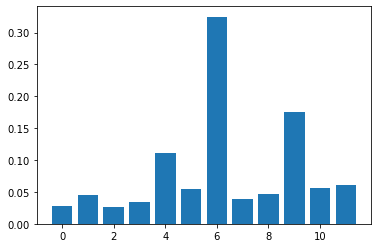

In [408]:
getFeatureImportance()

Since Authority Name shows no high relations, we drop it

<AxesSubplot:>

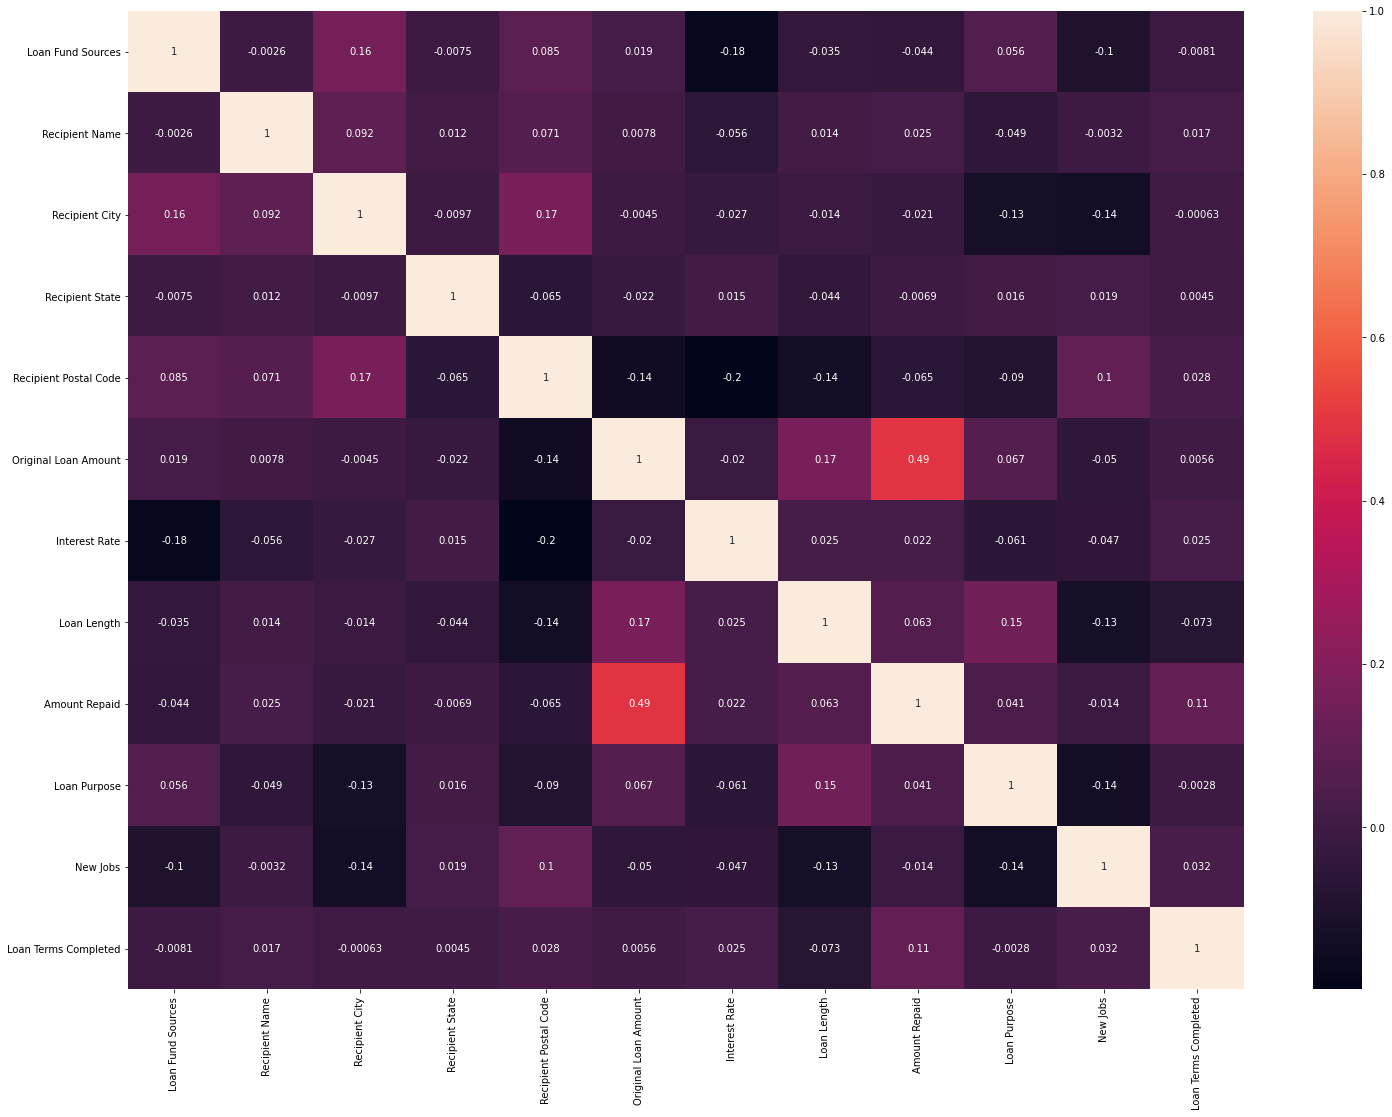

In [409]:
df = df.drop('Authority Name',axis=1)
plt.figure(figsize=(25,18))
#Creating Pearson Correlation Heatmap
sns.heatmap(df.corr(),annot=True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11973 entries, 11 to 13512
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan Fund Sources      11973 non-null  int32  
 1   Recipient Name         11973 non-null  int32  
 2   Recipient City         11973 non-null  int32  
 3   Recipient State        11973 non-null  int32  
 4   Recipient Postal Code  11973 non-null  int32  
 5   Original Loan Amount   11973 non-null  float64
 6   Interest Rate          11973 non-null  float64
 7   Loan Length            11973 non-null  float64
 8   Amount Repaid          11973 non-null  float64
 9   Loan Purpose           11973 non-null  int32  
 10  New Jobs               11973 non-null  int32  
 11  Loan Terms Completed   11973 non-null  int32  
dtypes: float64(4), int32(8)
memory usage: 1.1 MB


In [411]:
#Defining the Final Model
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [412]:
#Splitting in Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [413]:
#Standardising the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Applying the scalar from X_train on X_test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [414]:
#Importing the accuracy, F1, precision and recall libraries
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,precision_recall_fscore_support,recall_score

In [415]:
def GetRFC():
    #Importing the algorithm library
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy_score(y_test, y_pred)
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))

    print("\n")

In [416]:
def GetDTC():
    #Importing the algorithm library
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

In [417]:
def GetSVC():
    #Importing the algorithm library
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'poly', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

In [418]:
def GetXGB():
    #Importing the algorithm library
    from xgboost import XGBClassifier
    classifier = XGBClassifier(use_label_encoder=False,verbosity = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

In [419]:
df

Loan Fund Sources  Recipient Name  Recipient City  Recipient State  \
11                     0             960             397                7   
12                     0             960             397                7   
13                     0            1326             397                7   
14                     0            2243             397                7   
21                     1            2348             322                7   
...                  ...             ...             ...              ...   
13508                  0            2506              34                7   
13509                  0            2533              34                7   
13510                  0            2606              34                7   
13511                  0            2648              34                7   
13512                  0            2745              34                7   

       Recipient Postal Code  Original Loan Amount  Interest Rate  \
11                       317             100000.00           3.00   
12                       317              25179.75           3.00   
13                       317              81000.00           3.00   
14                       317              58457.00           3.00   
21                       342              35000.00           5.00   
...                      ...                   ...            ...   
13508                    374               5000.00           6.00   
13509                    374             229790.00           3.37   
13510                    374             292000.00           4.00   
13511                    378              24000.00           4.00   
13512                    374               5000.00           5.25   

       Loan Length  Amount Repaid  Loan Purpose  New Jobs  \
11             5.0       61741.85             1         0   
12             5.0       25179.75             1         0   
13             5.0       81000.00             1         0   
14            10.0       15840.62             1         0   
21             7.0        3918.40             0         1   
...            ...            ...           ...       ...   
13508          3.0         255.00             0         0   
13509         15.0       12153.00             7         0   
13510         20.0       30455.00             1         1   
13511          5.0       15420.00             1         0   
13512          3.0        2101.00             0         0   

       Loan Terms Completed  
11                        0  
12                        1  
13                        1  
14                        0  
21                        1  
...                     ...  
13508                     0  
13509                     0  
13510                     0  
13511                     0  
13512                     0  

[11973 rows x 12 columns]

In [420]:
#Call the algorithms
print("_______ RFC _______ \n")
GetRFC()
print("_______ DTC _______ \n")
GetDTC()
print("_______ XGB _______ \n")
GetXGB()

_______ RFC _______ 

[[2433   79]
 [ 301  181]]


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2512
           1       0.70      0.38      0.49       482

    accuracy                           0.87      2994
   macro avg       0.79      0.67      0.71      2994
weighted avg       0.86      0.87      0.86      2994

Accuracy: 87.31%
Recall: 37.55%


_______ DTC _______ 

[[2392  120]
 [ 157  325]]
0.9074816299265197


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2512
           1       0.73      0.67      0.70       482

    accuracy                           0.91      2994
   macro avg       0.83      0.81      0.82      2994
weighted avg       0.90      0.91      0.91      2994

Accuracy: 90.75%
Recall: 67.43%


_______ XGB _______ 

[[2440   72]
 [ 153  329]]
0.9248496993987976


              precision    recall  f1-score   support

           0       0.94      0.9

We find XGBoost to be the best model with 92.48% accuracy and 68.62% recall. Now we K-Cross Validate it.

In [421]:
from xgboost import XGBClassifier
classifier = XGBClassifier(use_label_encoder=False,verbosity = 0)

In [422]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.57 %
Standard Deviation: 0.74 %


### Experimenting with LightGBM

In [423]:
import lightgbm as lgb

In [424]:

d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 1381, number of negative: 7598
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1414
[LightGBM] [Info] Number of data points in the train set: 8979, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.153803 -> initscore=-1.705077
[LightGBM] [Info] Start training from score -1.705077


In [425]:
#Prediction
y_pred=clf.predict(X_test)
#convert into binary values
for i in range(len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
           y_pred[i]=1
    else:  
           y_pred[i]=0

In [426]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print()
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))


Accuracy: 83.90%


## We conclude that XGBoost is the best algorithm with an accuracy of 93.57% !